# Comparing Trend methods

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
from IPython.display import display, HTML, Markdown

## 1) Word = `DOW JONES` | Timeframe = "2019-10-01 2020-03-01"

### Different ways of combining windows

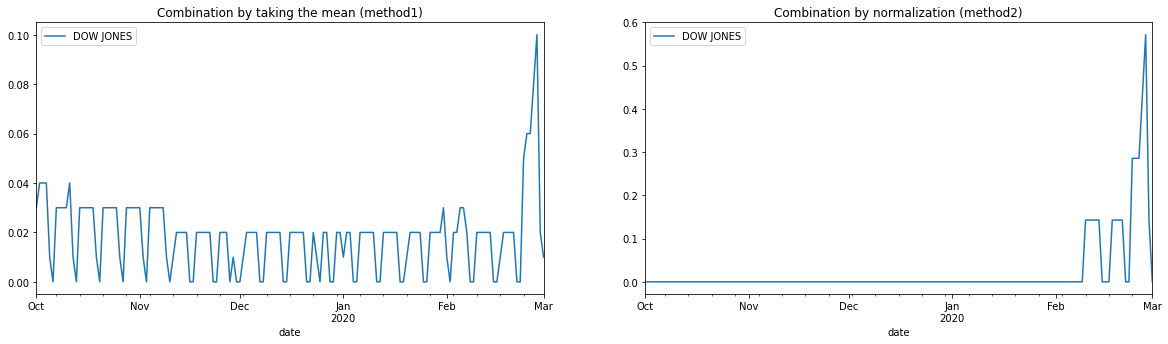

In [2]:
word = "DOW JONES"
timeframe_1 = "2019-10-01"
timeframe_2 = "2020-03-01"


df1 = pd.read_csv("data/daily_trend/{}.csv".format(word))
df1.date = pd.to_datetime(df1.date)
df1 = df1.set_index("date")
df1 = df1[word] / 100
df1.name = word
df1 = df1.to_frame()
df2 = pd.read_csv("data/daily_trend_normalized/{}.csv".format(word))
df2.date = pd.to_datetime(df2.date)
df2 = df2.set_index("date")
df2.columns = [word]

df1 = df1[timeframe_1 : timeframe_2]
df2 = df2[timeframe_1 : timeframe_2]

display(Markdown("### Different ways of combining windows"))

fig, ax = plt.subplots(1,2,figsize=(20,5))
df1.plot(ax=ax[0]);
ax[0].set_title("Combination by taking the mean (method1)");
df2.plot(ax=ax[1]);
ax[1].set_title("Combination by normalization (method2)");

### Data obtained from the API

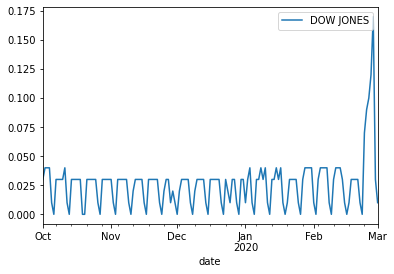

In [3]:
REFWORD = "google"
SLEEPTIME = 20
TIMEZONE_OFFSET = 360
HOST_LANGUAGE = 'en-US'
COUNTRY_ABBREVIATION = 'US'
FREQ_TO_DOWNLOAD = 'daily'
kw = word
timeframe = "{} {}".format(timeframe_1, timeframe_2)


trends = TrendReq(hl=HOST_LANGUAGE, tz=TIMEZONE_OFFSET)
trends.build_payload(kw_list=[kw, REFWORD],
                     geo=COUNTRY_ABBREVIATION,
                     timeframe=timeframe)
df = trends.interest_over_time()

df = df[word] / 100
df.name = word
df = df.to_frame()
display(Markdown("### Data obtained from the API"))
df.plot();

## Comparison by squared error

### Method1 error: mean = 0.00014 |  std = 0.00044 | sum =0.022

### Method2 error: mean = 0.00385 |  std = 0.01605 | sum =0.589

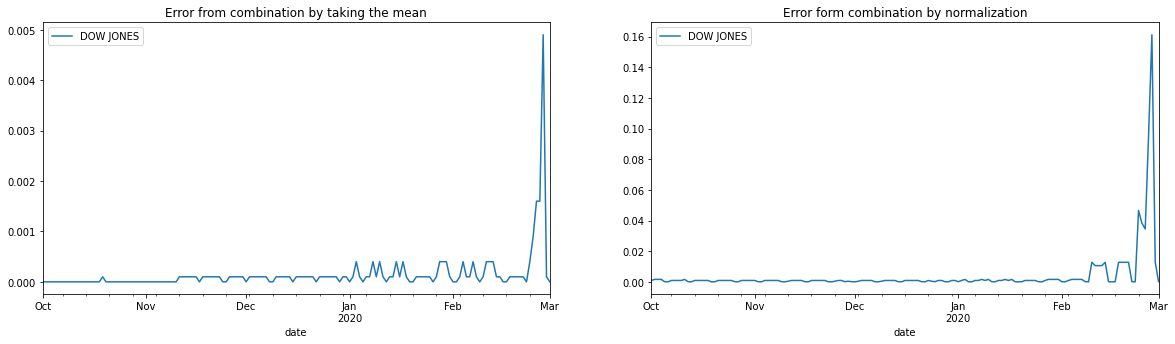

In [4]:
display(Markdown("## Comparison by squared error"))

error1 = ((df-df1)**2)
error2 = ((df-df2)**2)

mu1,std1,su1 = float(error1.mean()),float(error1.std()), float(error1.sum())
mu2,std2,su2 = float(error2.mean()),float(error2.std()), float(error2.sum())
error1_msg = "### Method1 error: mean = {:.5f} |  std = {:.5f} | sum ={:.3f}".format(mu1,std1,su1)
error2_msg = "### Method2 error: mean = {:.5f} |  std = {:.5f} | sum ={:.3f}".format(mu2,std2,su2)

display(Markdown(error1_msg))
display(Markdown(error2_msg))

display(Markdown(" "))

fig, ax = plt.subplots(1,2,figsize=(20,5))
error1.plot(ax=ax[0]);
ax[0].set_title("Error from combination by taking the mean");
error2.plot(ax=ax[1]);
ax[1].set_title("Error form combination by normalization");

## 2) Word = `act` | Timeframe = "2016-05-13 2016-11-13"

### Different ways of combining windows

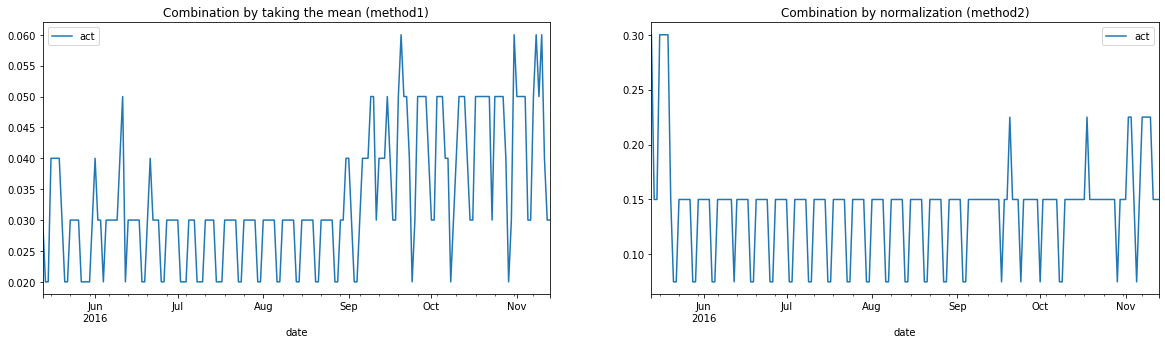

In [5]:
word = "act"
timeframe_1 = "2016-05-13"
timeframe_2 = "2016-11-13"


df1 = pd.read_csv("data/daily_trend/{}.csv".format(word))
df1.date = pd.to_datetime(df1.date)
df1 = df1.set_index("date")
df1 = df1[word] / 100
df1.name = word
df1 = df1.to_frame()
df2 = pd.read_csv("data/daily_trend_normalized/{}.csv".format(word))
df2.date = pd.to_datetime(df2.date)
df2 = df2.set_index("date")
df2.columns = [word]

df1 = df1[timeframe_1 : timeframe_2]
df2 = df2[timeframe_1 : timeframe_2]

display(Markdown("### Different ways of combining windows"))

fig, ax = plt.subplots(1,2,figsize=(20,5))
df1.plot(ax=ax[0]);
ax[0].set_title("Combination by taking the mean (method1)");
df2.plot(ax=ax[1]);
ax[1].set_title("Combination by normalization (method2)");

### Data obtained from the API

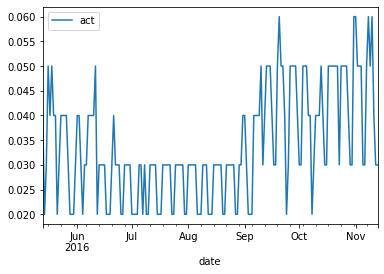

In [6]:
REFWORD = "google"
SLEEPTIME = 20
TIMEZONE_OFFSET = 360
HOST_LANGUAGE = 'en-US'
COUNTRY_ABBREVIATION = 'US'
FREQ_TO_DOWNLOAD = 'daily'
kw = word
timeframe = "{} {}".format(timeframe_1, timeframe_2)


trends = TrendReq(hl=HOST_LANGUAGE, tz=TIMEZONE_OFFSET)
trends.build_payload(kw_list=[kw, REFWORD],
                     geo=COUNTRY_ABBREVIATION,
                     timeframe=timeframe)
df = trends.interest_over_time()

df = df[word] / 100
df.name = word
df = df.to_frame()
display(Markdown("### Data obtained from the API"))
df.plot();

## Comparison by squared error

### Method1 error: mean = 0.00002 |  std = 0.00004 | sum =0.003

### Method2 error: mean = 0.01313 |  std = 0.01056 | sum =2.429

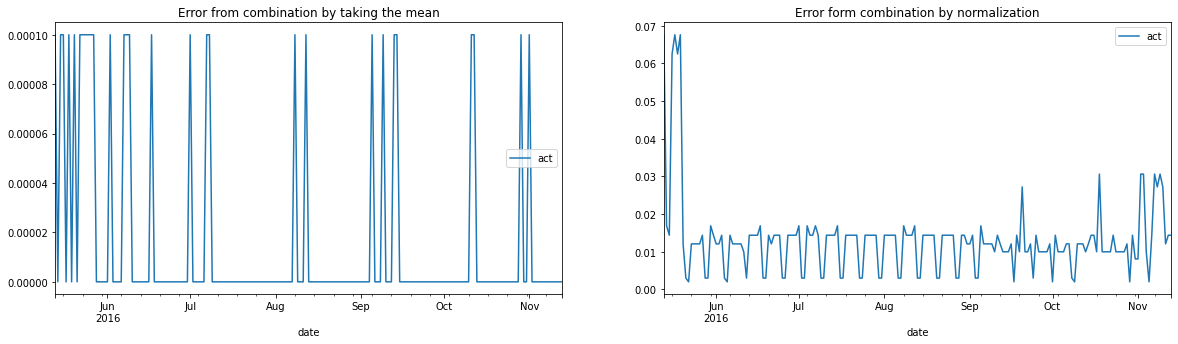

In [7]:
display(Markdown("## Comparison by squared error"))

error1 = ((df-df1)**2)
error2 = ((df-df2)**2)

mu1,std1,su1 = float(error1.mean()),float(error1.std()), float(error1.sum())
mu2,std2,su2 = float(error2.mean()),float(error2.std()), float(error2.sum())
error1_msg = "### Method1 error: mean = {:.5f} |  std = {:.5f} | sum ={:.3f}".format(mu1,std1,su1)
error2_msg = "### Method2 error: mean = {:.5f} |  std = {:.5f} | sum ={:.3f}".format(mu2,std2,su2)

display(Markdown(error1_msg))
display(Markdown(error2_msg))

display(Markdown(" "))

fig, ax = plt.subplots(1,2,figsize=(20,5))
error1.plot(ax=ax[0]);
ax[0].set_title("Error from combination by taking the mean");
error2.plot(ax=ax[1]);
ax[1].set_title("Error form combination by normalization");